In [34]:
# Группа 7
# Домашнее задание 4

# Часть 2_B: находим выбросы с помощью DBSCAN

# Импорты
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Torque [Nm]')

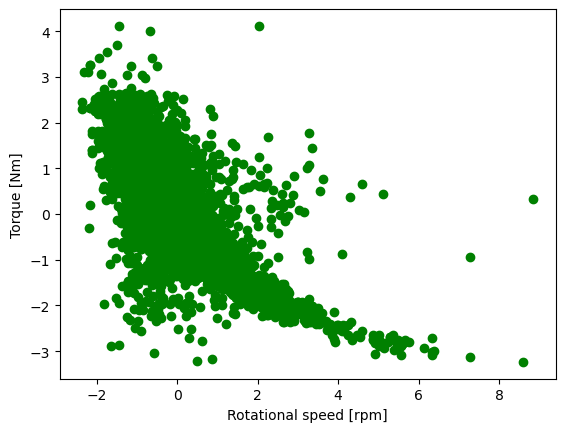

In [40]:
# Так же как и в части 2_A будем искать выбросы в переменных Rotational speed [rpm] и Torque [Nm],
# возьмём только часть выборки, так как всю выборку DBSCAN очень долго обрабатывает

initial_data = pd.read_csv('files/train.csv')
X = initial_data[['Rotational speed [rpm]', 'Torque [Nm]']].iloc[35000:45000]

# Нормализуем данные
min_max_scaler = StandardScaler().fit(X)
x_norm_array = min_max_scaler.transform(X)
X['Rotational speed [rpm]'] = x_norm_array[:,0]
X['Torque [Nm]'] = x_norm_array[:,1]

# Построим ещё раз диаграмму рассеяния, только без классификации
plt.scatter(X['Rotational speed [rpm]'], X['Torque [Nm]'], c='green')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')

In [42]:
# Подберём оптимальные параметры для DBSCAN
samples_number = np.array([3,5,10])
eps = np.array([1,1.2,1.5,1.7])
silh={}

for n in samples_number: 
    for e in eps:
        y_pred = DBSCAN(eps=e, min_samples=n).fit_predict(X)
        silh_score = silhouette_score(X, y_pred, metric='euclidean')
        silh.update({silh_score: [e, n]})
        print(f"samples_number={n}   eps={e}   silh_score={silh_score}")

print('\nЛучшие гиперпараметры eps={:.2f} и min_samples={}'.format(silh.get(max(silh.keys()))[0], 
                                                                                     silh.get(max(silh.keys()))[1]))

samples_number=3   eps=1.0   silh_score=0.7797625819754378
samples_number=3   eps=1.2   silh_score=0.7797625819754378
samples_number=3   eps=1.5   silh_score=0.7643604092401679
samples_number=3   eps=1.7   silh_score=0.7643604092401679
samples_number=5   eps=1.0   silh_score=0.7797625819754378
samples_number=5   eps=1.2   silh_score=0.7797625819754378
samples_number=5   eps=1.5   silh_score=0.7643604092401679
samples_number=5   eps=1.7   silh_score=0.7643604092401679
samples_number=10   eps=1.0   silh_score=0.7649907424206007
samples_number=10   eps=1.2   silh_score=0.7649907424206007
samples_number=10   eps=1.5   silh_score=0.7797625819754378
samples_number=10   eps=1.7   silh_score=0.7643604092401679

Лучшие гиперпараметры eps=1.50 и min_samples=10


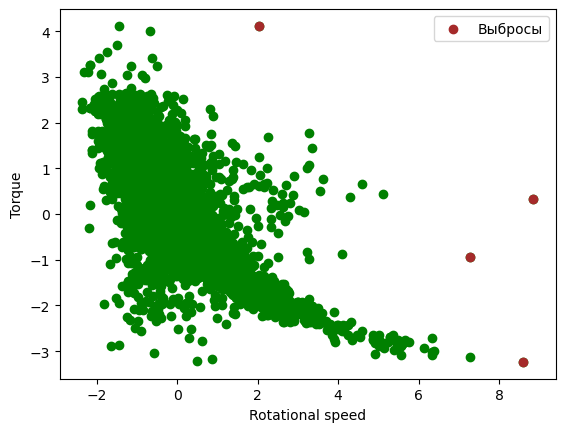

In [44]:
# С помощью DBSCAN и оптимальных параметров найдём выбросы
model = DBSCAN(eps=1.5, min_samples=10)
y_pred = model.fit_predict(X)
X['y_pred'] = y_pred
X_outliers = X.loc[X['y_pred'] == -1]

plt.scatter(X['Rotational speed [rpm]'], X['Torque [Nm]'], c='green')
plt.scatter(X_outliers['Rotational speed [rpm]'], X_outliers['Torque [Nm]'], c='brown', label='Выбросы')
plt.xlabel('Rotational speed')
plt.ylabel('Torque')
plt.legend()

In [ ]:
# Видим, что выбросы определяются по другому принципу, в отличие от статистических методов